# Image Processing SoSe 22 - Assignment - 08

### Deadline is 16.06.2022 at 11:55am

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.

In [43]:
# display the plots inside the notebook
%matplotlib inline

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from skimage.data import chelsea
from skimage.color import rgb2gray
import math
from scipy.fft import dctn as scipy_dctn, idctn as scipy_idctn

pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

# Exercise 1 - 2D DCT - 4 Points
Transform a picture with 2D DCT (discrete cosine transform), which you must implement manually using DCT-II.
For the 2D-DCT, perform two 1D-DCT-transformations. Therefore, implement a method which returns a normalized DCT-II matrix. Plot a normalized 16x16 DCT-II-matrix (with colors reflecting the values in the matrix).

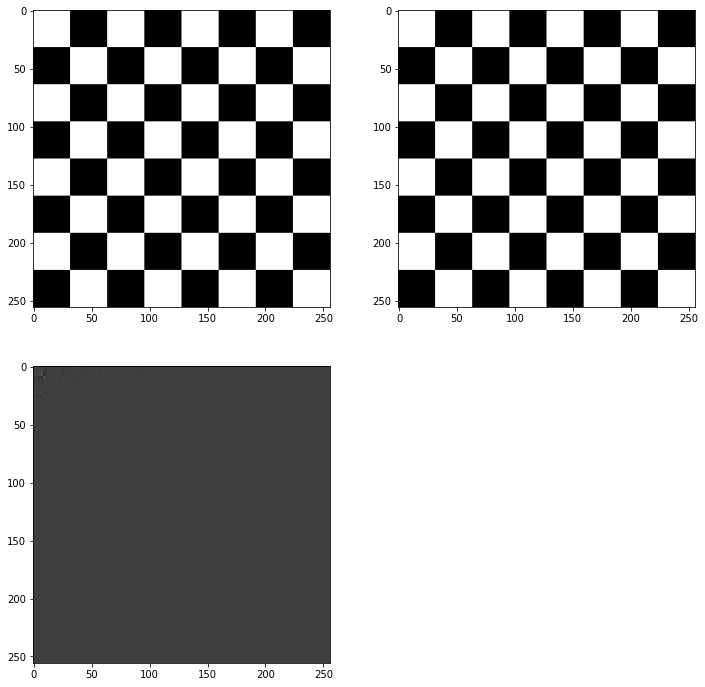

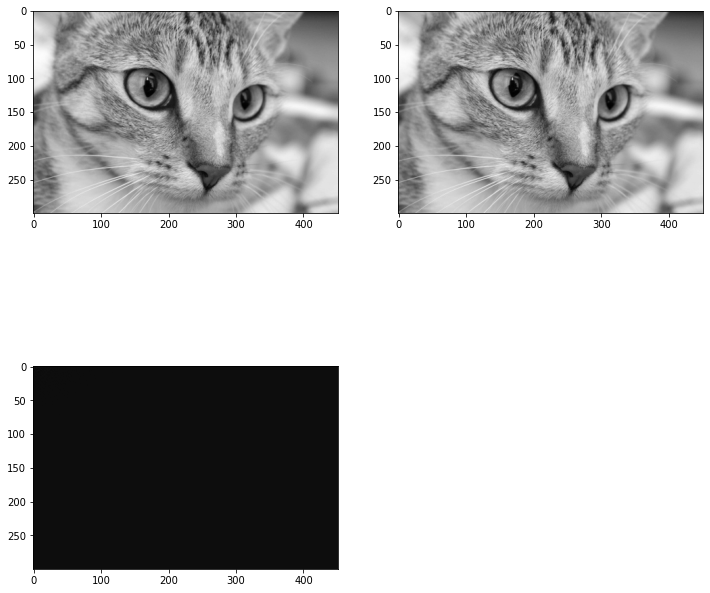

In [45]:
def dct_matrix(N):
    C = np.zeros((N,N))
    for n_1 in range(N):
        for n_2 in range(N):
            if n_1 == 0:
                C[n_1][n_2] = math.sqrt(1/N)
            else:
                C[n_1][n_2] = math.sqrt(2/N)*math.cos((math.pi/N)*((n_2)+(1/2))*n_1)
    return C

def dct2d(img):
    """
    Returns the 2d discrete cosine transformation
    """
    N_1 = img.shape[0]
    N_2 = img.shape[1]
    dct_mat_1 = dct_matrix(N_1)
    dct_mat_2 = dct_matrix(N_2)
    dct_img = np.matmul(dct_mat_1,img)
    dct_img = np.matmul(dct_img,dct_mat_2.transpose())
    return dct_img


def inv_dct2d(img):
    """
    Returns the 2d inverse discrete cosine transformation
    """
    N_1 = img.shape[0]
    N_2 = img.shape[1]
    dct_mat_1 = dct_matrix(N_1)
    dct_mat_2 = dct_matrix(N_2)
    dct_img = np.matmul(dct_mat_1.transpose(),img)
    dct_img = np.matmul(dct_img,dct_mat_2)
    return dct_img

def chess_board(n=8, field_size=32):
    board = np.zeros((n*field_size, n*field_size))
    s = field_size
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board[i*s:(i+1)*s, j*s:(j+1)*s] = 1
    return board

for pic in [chess_board(), rgb2gray(chelsea())/255.0]:
    plt.subplot(221)
    plt.imshow(pic, cmap='gray')
    plt.subplot(222)
    plt.imshow(inv_dct2d(dct2d(pic)), cmap='gray')
    plt.subplot(223)
    plt.imshow(np.real(dct2d(pic)), cmap='gray')
    plt.show()

# Exercise 2 - 1 Point: (Manual calculation, no code needed.)

Given is a signal `[5,10,12]`. Now you have to mirror the signal as in the lectures (resulting in a signal of length 5) and perform a DFT. Please write down all coefficients in the frequency spectrum. What do you see (one sentence)?

In [46]:
# mirrored signal: [5,10,12,12,10]
# DFT mit N=5: 1/(math.sqrt(5))*
# [
# [1,   1,      1,      1,      1],
# [1,   w,      w^2,    w^3,    w^4],
# [1,   w^2,    w^4,    w,      w^3],
# [1,   w^3,    w,      w^4,    w^2],
# [1,   w^4,    w^3,    w^2,    w]
# ]
# Ausgerechnet (ohne Imaginärteile, da diese sich ja am Ende eh rauskürzen; W1' := W1 konjugiert -> W1 = W1'); w = cos(2(pi)/5):
# 1/(math.sqrt(5)) * [W0*5+W1*10+W2*12+W2'*12+W1'*10] = 1/(math.sqrt(5)) * [W0*5+(W1+W1')*10+(W2+W2')*12] =
# 1/(math.sqrt(5)) * [5+2*10+2*12, 5+2*w*10+2*w**2*12, 5+2*w**2*10+2*w**4*10, 5+2*w**3*10+2*w*12, 5+2*w**4*10+2*w**3*12] =
# 1/(math.sqrt(5)) * [49, 13.47213595499958, 7.09220259843842, 13.006577808748213, 5.890576474687264] =
# [21.913466179497938, 6.024922359499621, 3.17172942406179, 5.816718427000253, 2.634345884812358]


# Exercise 3 - High and Low Pass filter with 2D DCT - 5 Points

Implement the `high_pass` and `low_pass` functions which work on the frequency spectrum of a 2D-DCT
transformed image. Apply the filters to both the chessboard and cat image and transform the
result back into image space.

Show the spectrum before and after filtering as well as the resulting images after backtransformation
into image space.

In [47]:
def high_pass(img_ft, n):
    """Removes the low frequencies"""
    # your code here
    ft = img_ft.copy()
    ft[:n, :n] = 0
    return ft

def low_pass(img_ft, n):
    """Removes the high frequencies"""
    # your code here
    ft = img_ft.copy()
    ft[n:, :] = 0
    ft[:, n:] = 0
    return ft
    
def inv_dct_and_plot(img_ft):
    plt.imshow(inv_dct2d(img_ft), cmap='gray')
    plt.show()

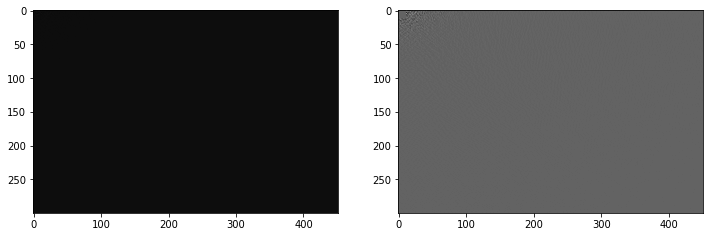

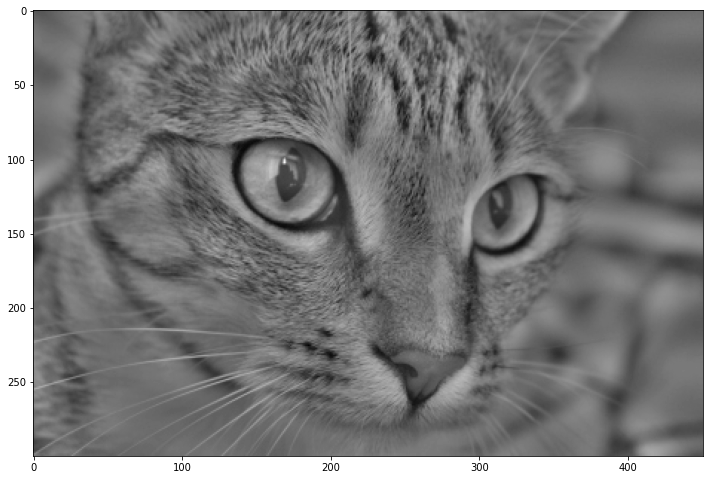

In [48]:
img = rgb2gray(chelsea() / 255)
# remove the low frequencies
chelsea_high_freq = high_pass(dct2d(img), 12)
plt.subplot(221)
plt.imshow(np.real(dct2d(img)), cmap='gray')
plt.subplot(222)
plt.imshow(np.real(chelsea_high_freq), cmap='gray')
plt.show()
inv_dct_and_plot(chelsea_high_freq)

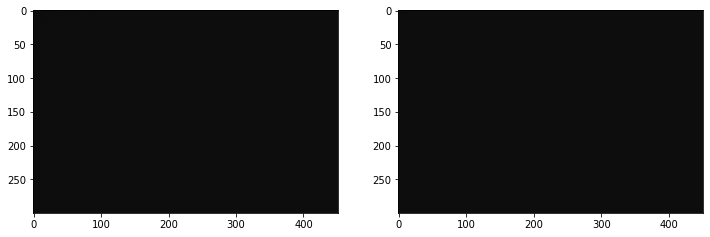

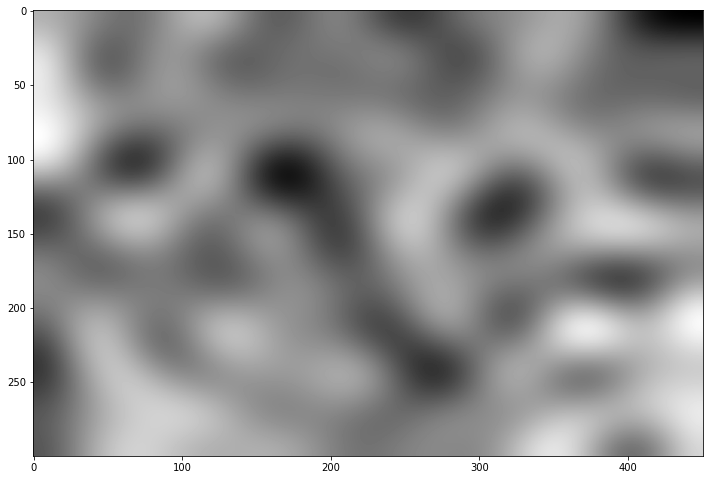

In [49]:
# remove the high frequencies
chelsea_low_freq = low_pass(dct2d(img), 12)
plt.subplot(221)
plt.imshow(np.real(dct2d(img)), cmap='gray')
plt.subplot(222)
plt.imshow(np.real(chelsea_low_freq), cmap='gray')
plt.show()
inv_dct_and_plot(chelsea_low_freq)

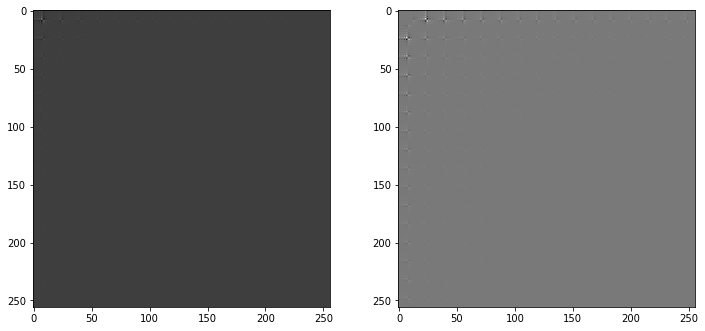

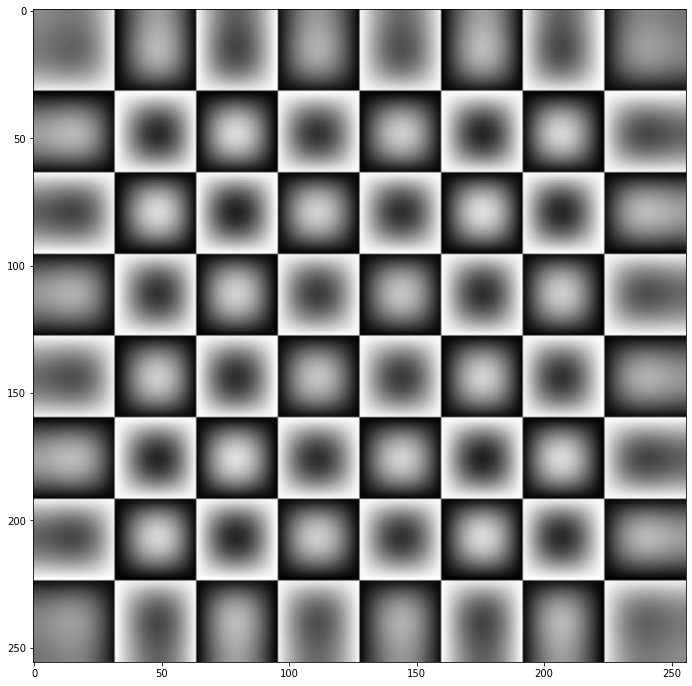

In [50]:
# remove the low frequencies
chess_board_high_freq = high_pass(dct2d(chess_board()), 12)
plt.subplot(221)
plt.imshow(np.real(dct2d(chess_board())), cmap='gray')
plt.subplot(222)
plt.imshow(np.real(chess_board_high_freq), cmap='gray')
plt.show()
inv_dct_and_plot(chess_board_high_freq)

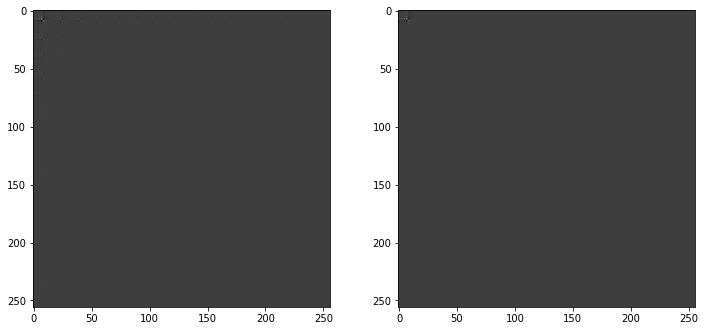

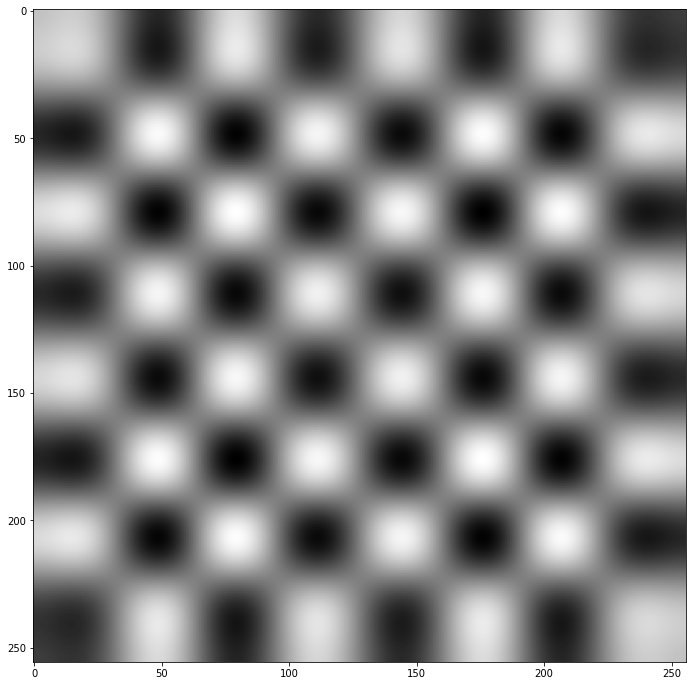

In [51]:
# remove the high frequencies
chess_board_low_freq = low_pass(dct2d(chess_board()), 12)
plt.subplot(221)
plt.imshow(np.real(dct2d(chess_board())), cmap='gray')
plt.subplot(222)
plt.imshow(np.real(chess_board_low_freq), cmap='gray')
plt.show()
inv_dct_and_plot(chess_board_low_freq)